# []

In [ ]:
import fatbot as fb
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
db = fb.db.db12
permute_states=False
delta_reward=True
horizon=1500
testing=True
initial_state_list =  list(db.isd.values()) 
scheme=dict( 
            #dis_target_point=   1.0, 
            dis_neighbour =     1.0,
            #dis_target_radius=  1.0, 
            all_unsafe=         1.0, 
            all_neighbour=      1.0, 
            occluded_neighbour= 2.0, 
            )

env = db.envF(
  testing, 
  horizon,
  scheme,
  delta_reward,
  permute_states,
  *initial_state_list )

In [ ]:
env.reset()
_=env.render()
plt.show()

In [ ]:
env.N_BOTS

In [ ]:
env.sensor_data.shape

# []

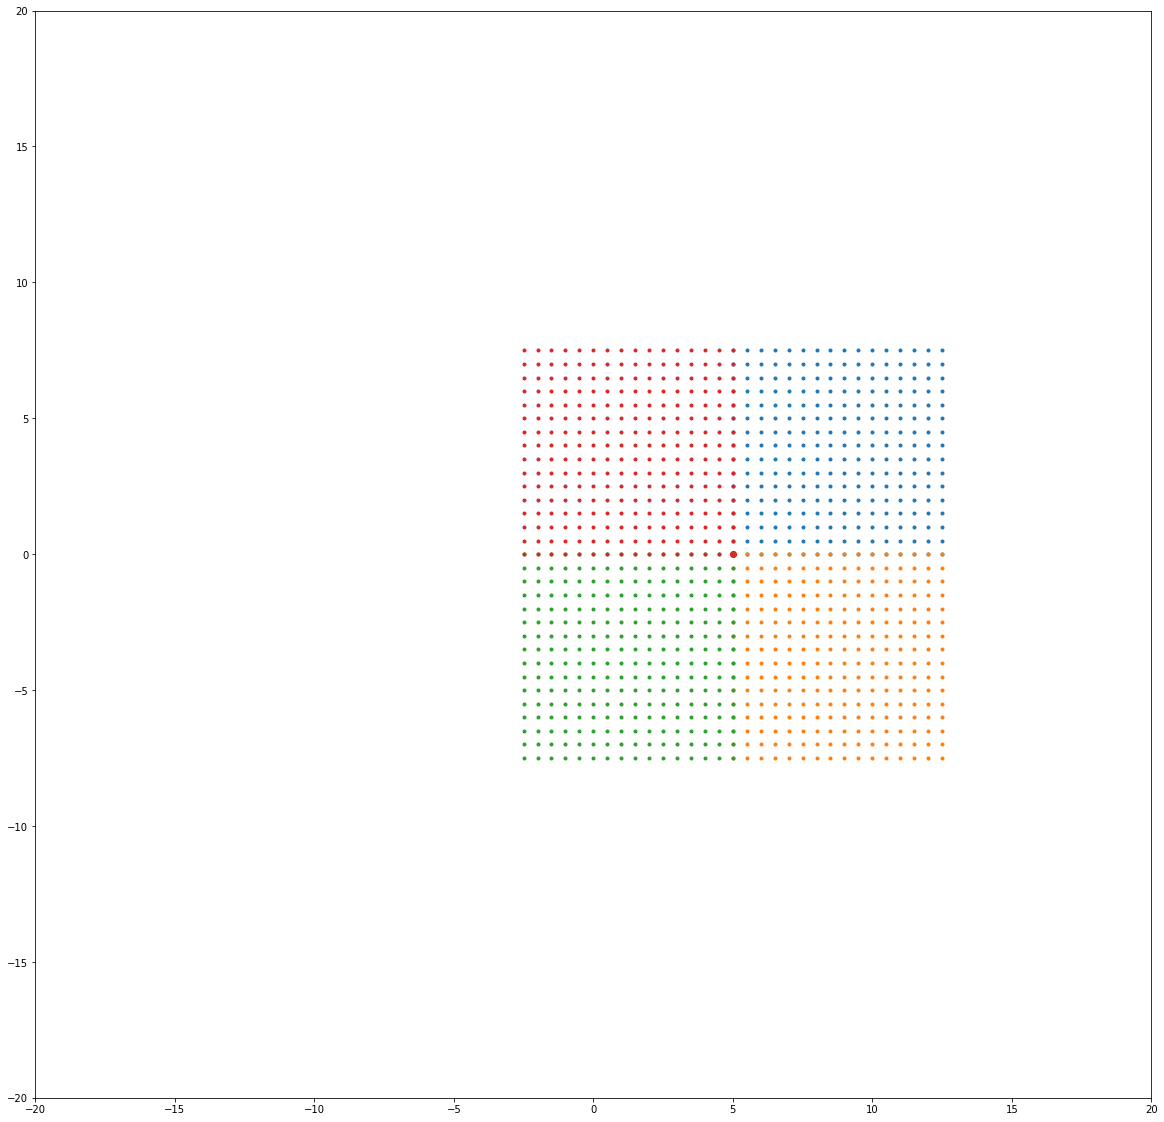

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import os

def space_filling(start_x=0.0, start_y=0.0, epsilon=1.0, n_iter=3, p_margin=5.0):
    def apply_rules(s):
        """ Hilbert Curve as a Lindenmayer system (L-system)
        https://en.wikipedia.org/wiki/Hilbert_curve#Representation_as_Lindenmayer_system"""
        s=s.replace("a","-Bf+AfA+fB-")  # capital letters "A" and "B" so that the second operation
        s=s.replace("b","+Af-BfB-fA+")  # doesn't apply to the changes already made
        return s.lower() # make everyone lowercase
    
    dxdys = [ np.array([[ epsilon, 0], [ 0, epsilon], [-epsilon, 0], [ 0,-epsilon] ]),
              np.array([[ epsilon, 0], [ 0, -epsilon], [-epsilon, 0], [ 0,epsilon] ]),
              np.array([[ -epsilon, 0], [ 0, -epsilon], [epsilon, 0], [ 0,epsilon] ]),
              np.array([[ -epsilon, 0], [ 0, epsilon], [epsilon, 0], [ 0,-epsilon] ]),
    ]
    ps = []
    for dxdy in dxdys:
        axiom = "a"
        #n=n_iter # number of iterations
        #epsilon = 0.5
        # displacements, ordered in a counter-clockwise direction

        # displacement is of size 1, so the higher n is, the greater the domain
        #start_x, start_y = 0.0, 0.0
        length = 2**n_iter-1
        margin = (p_margin/100)*length
        #domain = [start_x-margin,length+margin,start_y-margin,length+margin] # a 5% margin around the curve
        s = axiom # string to iterate upon

        for i in np.arange(n_iter):
            s = apply_rules(s)

        # "a" and "b" can be erased now
        s=s.replace("a","")
        s=s.replace("b","")

        p = np.array([[start_x, start_y ]]) # this is the starting point (0,0)

        # iterate on the string s
        for i,c in enumerate(s):
            # uncomment to see how fast things are going
            #print("{:d}/{:d}".format(i,len(s)))
            #print(f'{s=}')
            
            # rotations "+" and "-" change the displacement array dxdy
            # "+" means clockwise rotation
            if c == '+': dxdy = np.roll(dxdy,+1,axis=0)
            # "-" means counter-clockwise rotation
            if c == '-': dxdy = np.roll(dxdy,-1,axis=0)
            # forward "f"
            if c == 'f': p = np.vstack([p, [p[-1,0]+dxdy[0,0],p[-1,1]+dxdy[0,1]] ]) # add one more point to array p
        ps.append(p)
    return ps

start_x, start_y = 5.0, 0.0
ps = space_filling(start_x, start_y, epsilon=0.5, n_iter=4, p_margin=5)
plt.figure(figsize=(20,20))
plt.xlim(-20,20)
plt.ylim(-20,20)
plt.scatter([start_x], [start_y], marker='o', color='red')
for p in ps:
    plt.scatter(p[:,0], p[:,1], marker='.')

In [ ]:
p